## Latar Belakang Airbnb
Airbnb adalah sebuah platform daring (online) yang memungkinkan individu untuk menyewakan properti mereka kepada wisatawan atau tamu dalam jangka pendek. Didirikan pada tahun 2008, Airbnb menghubungkan pemilik properti (host) dengan penyewa (guest) melalui aplikasi atau situs web. 

Bangkok adalah salah satu destinasi utama bagi wisatawan internasional, menjadikannya pasar yang sangat menguntungkan untuk bisnis penginapan dan properti di platform seperti Airbnb.

Berikut adalah beberapa lokasi strategis kawasan wisata di Bangkok dan sekitarnnya

<li>Pusat Kota (Sukhumvit, Silom, Sathorn) – Cocok untuk ekspatriat dan wisatawan bisnis, properti di daerah ini memiliki harga sewa tinggi dengan permintaan stabil.</li>

<li>Kawasan Wisata (Khaosan Road, Rattanakosin, Old Town) – Cocok untuk backpackers dan wisatawan budaya yang mencari pengalaman autentik.</li>

<li>Dekat Transportasi Umum (BTS & MRT Stations) – Properti yang dekat stasiun BTS Skytrain dan MRT cenderung lebih menarik bagi tamu karena kemudahan akses.</li>





## Cara Kerja Airbnb

### 1. Pemilik Properti (Host) Mendaftarkan Properti

        Host dapat menyewakan kamar, apartemen, rumah, vila, atau bahkan tempat unik seperti rumah pohon atau kapal. Mereka menetapkan harga, aturan rumah, dan ketersediaan.

### 2. Tamu (Guest) Mencari dan Memesan Penginapan

        Pengguna mencari akomodasi berdasarkan lokasi, harga, fasilitas, dan ulasan. Pembayaran dilakukan melalui platform Airbnb yang juga memberikan perlindungan bagi host dan tamu.

### 3. Menginap & Ulasan

        Setelah menginap, tamu dan host bisa saling memberikan ulasan untuk meningkatkan transparansi. 

## Pernyataan Masalah
Ulasan pada properti Airbnb adalah komentar atau penilaian yang diberikan oleh tamu setelah mereka selesai menginap di sebuah properti yang disewa melalui platform Airbnb.

Ulasan menjadi bahan analisis yang menarik karena ulasan memiliki dampak besar sebelum calon penyewa memilih properti yang akan disewa. Ulasan digunakan sebagai ide untuk host dalam memperbaiki kualitas propertinnya juga ulasan bisa dijadikan alat promosi yang gratis yang di buat oleh pelanggan. Maka dari itu, kami menentukan beberapa pernyataan masalah sebagai acuan untuk analisis ulasan Airbnb di Bangkok.

Tingkat keterisian ulasan pada setiap transaksi yang bisa dianalisis dengan faktor,\
    - host_name & host id\
    - neighbourhood\
    - tipe properti\
    

Sehingga, diharapkan analisa ini dapat mengetahui,\
    - Tingkat pengaruh jumlah review terhadap faktor diatas\
    - Insight dari tingkat keterisian review\
    - Trends review dalam timeline\
    - Rekomendasi untuk meningkatkan proporsi review.


## Sumber Data
Data Diambil dari format csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait detail host atau pemilik properti dalam penyewaan Airbnb. Ada 14 kolom di dalam dataset, yaitu:  

* id : Kode unik untuk yang menyewa properti Airbnb
* name : Nama orang yang menyewa
* host_id : kode unik untuk pemilik properti
* host_name : Nama pemilik properti
* neighborhood : Distrik / area properti
* latitude : titik koordinat properti
* longitude : titik koordinat properti
* room_type : Jenis Kamar (entire place/ private room /shared rooms)
* price : harga per hari untuk sewa properti (Baht)
* minimum_nights : Jumlah minimal per malam dalam reservasi 
* number_of_reviews : Jumlah list review pada properti
* last_review : Tanggel terakhir properti tersebut di ulas
* Calculated_host_listings_count : Berapa banyak jumlah properti yang disewa pada host tersebut.
* availability_365 : Ketersediaan properti dalam metrik berapa hari tersedia dalam 365 hari kedepan
* number_of_reviews_ltm : jumlah ulasan yang dimiliki orang yang akan menyewa selama 12 bulan terakhir  




In [2]:
df=pd.read_csv('Airbnb Listings Bangkok.csv',index_col=0)
display(df.head(),df.tail())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.



### Cek Info Data

In [3]:
# Cek Kolom dan Baris
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-

Mengubah Format id ke str dan last review dari obj ke date and time

In [4]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [5]:
df['id'] = df['id'].astype(str)
# Mengubah kolom last_review menjadi datetime
df['last_review'] = pd.to_datetime(df['last_review'],format='%Y-%m-%d' , errors='coerce')

In [6]:
# Cek Nilai Statistik Raw
display(df.describe(), df.describe(include='object'))

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,2021-08-30 08:37:49.316375296,0.813145,13.889618,244.378643,3.481519
min,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.120000,1.000000,138.000000,0.000000
50%,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.435000,4.000000,309.000000,0.000000
75%,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,1.060000,13.000000,360.000000,3.000000
max,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937


,id,name,host_name,neighbourhood,room_type
count,15854,15846,15853,15854,15854
unique,15854,14794,5312,50,4
top,790476492384199044,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,1,45,228,2153,8912


In [7]:

# Cek Data Unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
1,name,14794,"[Nice room with superb city view, Easy going l..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1..."


In [8]:
#Cek duplikat
print(f'Jumlah data yang duplikat adalah {df.duplicated().sum()}')

Jumlah data yang duplikat adalah 0


In [9]:
#cek null
df.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [10]:
#Cek data yang null
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


### Handle Data Null
Karena Nama adalah data kategorikal maka nama yang null kami isi dengan nama 'fulan' (Kita tidak menganalisa data berdasarkan nama)

In [11]:
#fillna nama yang null
df['name'].fillna('Fulan', inplace=True)

In [12]:
#cek host name yang null
df[df['host_name'].isnull()]



,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [13]:
# Karena Nama adalah data kategorikal maka nama yang null kami isi dengan nama 'fulan' (Kita tidak menganalisa data berdasarkan nama)
df['host_name'].fillna('Asep', inplace=True)

In [14]:
#cek null
df.isnull().sum()


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Karena jumlah null pada last review dan review per bulan adalah sama, kita perlu cek apakah mereka null di baris yang sama ? 

In [15]:
dfnull = df[df['last_review'].isnull() & df['reviews_per_month'].isnull()]
dfnull

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


Ternyata mereka null di baris yang sama. Maka dilakukan pengecekan data yang null, sebagai contoh kita analisis data dengan host name phakhamon

In [16]:
df[df['host_name']=='Phakhamon']


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3545,18806239,Family Suite Room Pratunam Nr ShopingMktBTS Fr...,118818288,Phakhamon,Ratchathewi,13.753180,100.538590,Private room,1100,1,64,2022-07-13,0.95,1,336,2
15571,782433757969414092,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753706,100.539806,Private room,1529,1,0,NaT,NaN,14,365,0
15573,782475319027400284,Euro LuxuryHotel PratunamMKtDoubleBedNrShoping...,491526222,Phakhamon,Ratchathewi,13.754098,100.538700,Private room,1114,1,0,NaT,NaN,14,365,0
15574,782480781313470308,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754140,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15688,790476808308702333,Euro LuxuryHotel PratunamMKtDoubleBedNrShoping...,491526222,Phakhamon,Ratchathewi,13.754900,100.540250,Private room,1029,1,0,NaT,NaN,14,362,0
15841,790451855541607948,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752631,100.538843,Private room,1214,1,0,NaT,NaN,14,365,0
15843,790458045665867830,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.754421,100.538842,Private room,1529,1,0,NaT,NaN,14,363,0
15844,790458367159269431,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.754133,100.539957,Private room,1529,1,0,NaT,NaN,14,365,0
15845,790458614980542576,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.754496,100.540597,Private room,1443,1,0,NaT,NaN,14,365,0
15846,790460236485689124,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.754724,100.539638,Private room,1443,1,0,NaT,NaN,14,365,0


Ternyata disetiap review per month yang kosong, akan membuat tabel last review kosong. Terdapat 5790 data kosong dari keseluruhan 15854 data, atau 36.5%, sehingga null ini harus di handle dengan melihat pattern data, sepertinnya ini terjadi karena memang properti belum pernah ada di review, namun kita pastikan dahulu dengan pengecekan. 

In [17]:
# Membuat dataframe dengan reviews yang null
dfnull = df[(df['number_of_reviews'] == 0) & (df['reviews_per_month'].isnull()) & (df['number_of_reviews_ltm'] == 0)]

dfnull

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


fiillna data null dengan angka 0 karena properti tersebut memang belum pernah di review

In [18]:
df['last_review'].fillna(0,inplace=True)
df['reviews_per_month'].fillna(0,inplace=True)

In [19]:
df['last_review'].isnull().sum()

np.int64(0)

In [20]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [21]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


Data Null sudah terhandle

### Handle Input Non Latin

In [22]:
# Menghapus spasi pada kolom Name
df['name'].str.strip()

0                          Nice room with superb city view
1                           Easy going landlord,easy place
2                        modern-style apartment in Bangkok
3           Spacious one bedroom at The Kris Condo Bldg. 3
4                               Suite Room 3 at MetroPoint
                               ...                        
15849        素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街
15850    Euro LuxuryHotel PratunamMKt TripleBdNrShoping...
15851    Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea
15852    Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea
15853    Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea
Name: name, Length: 15854, dtype: object

Lalu kita harus ubah data dengan bahasa pinyin/ kanji ke bahasa latin

In [23]:
from IPython.core.display import display, HTML
# Mencari karakter non latin menggunakan regex
pattern = r'[^\x00-\x7F]'  # Matches any non-ASCII character

non_latin_names_df = df[df['name'].str.contains(pattern, regex=True, na=False)].reset_index(drop=True)
# Display DataFrame with a scrollable div
display(HTML(non_latin_names_df.to_html(classes="scrollable", escape=False)))

# CSS for scrollable div
scroll_style = """
    <style>
        .scrollable {
            max-height: 200px;
            overflow-y: auto;
            display: block;
        }
    </style>
"""
display(HTML(scroll_style))

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1823321,กรองทองแมนชั่น (ลาดพร้าว 81),9545111,Penjit,Wang Thong Lang,13.789380,100.613400,Private room,600,1,0,0,0.00,1,365,0
1,1862089,❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,1200,1,419,2022-12-07 00:00:00,3.77,37,355,1
2,1862331,☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪,8214044,Evan From Sanctuary House,Sathon,13.720730,100.546900,Entire home/apt,1450,1,268,2022-12-15 00:00:00,2.59,8,350,7
3,1862377,☞Downtown Central Studio-Bangkok MRT,8214044,Evan From Sanctuary House,Sathon,13.720630,100.546940,Entire home/apt,1200,1,310,2022-12-11 00:00:00,3.00,8,331,9
4,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,2022-12-15 00:00:00,4.02,7,320,29
5,385130,❂Citycenter✔Subway station✔Private Bathroom4Aircon,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,800,1,396,2020-04-30 00:00:00,3.02,37,361,0
6,393066,✺✺99 feet in the sky✺✺,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,829,1,430,2022-10-01 00:00:00,3.39,37,334,10
7,1133843,เฮ้าส์โหมด House Mode,6220137,Prapussorn,Thon buri,13.726463,100.491293,Private room,800,1,0,0,0.00,1,365,0
8,413824,❂100% Private&Central Light EnSuite,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,800,1,325,2020-03-14 00:00:00,2.67,37,358,0
9,1982413,Hip Studio ♥ Of BKK+River+BTS+WIFI,3346331,Bee,Sathon,13.712780,100.515600,Entire home/apt,811,2,404,2022-12-15 00:00:00,3.67,7,304,19


In [24]:
#!pip install pandas unidecode transliterate


In [25]:
from unidecode import unidecode
from transliterate import translit

# Melakukan pengubahan bahasa non latin menjadi latin
non_latin_names_df['latin_Name'] = non_latin_names_df['name'].apply(lambda x: unidecode(x))

non_latin_names_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,latin_Name
0,1823321,กรองทองแมนชั่น (ลาดพร้าว 81),9545111,Penjit,Wang Thong Lang,13.78938,100.61340,Private room,600,1,0,0,0.00,1,365,0,kr`ngth`ngaemnchan (laadphraaw 81)
1,1862089,❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,1200,1,419,2022-12-07 00:00:00,3.77,37,355,1,Perfect EscapeSunny Roof EnSuite
2,1862331,☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs...,8214044,Evan From Sanctuary House,Sathon,13.72073,100.54690,Entire home/apt,1450,1,268,2022-12-15 00:00:00,2.59,8,350,7,Roomy Studio 4 Family r friendsNo Stairs
3,1862377,☞Downtown Central Studio-Bangkok MRT,8214044,Evan From Sanctuary House,Sathon,13.72063,100.54694,Entire home/apt,1200,1,310,2022-12-11 00:00:00,3.00,8,331,9,Downtown Central Studio-Bangkok MRT
4,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.71192,100.51535,Entire home/apt,866,2,472,2022-12-15 00:00:00,4.02,7,320,29,"Chic Studio, Easy Walk to Pier & BTS Taksin"


In [26]:
dfnonlatin = non_latin_names_df.drop(columns='name')
dfnonlatin

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,latin_Name
0,1823321,9545111,Penjit,Wang Thong Lang,13.789380,100.613400,Private room,600,1,0,0,0.00,1,365,0,kr`ngth`ngaemnchan (laadphraaw 81)
1,1862089,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,1200,1,419,2022-12-07 00:00:00,3.77,37,355,1,Perfect EscapeSunny Roof EnSuite
2,1862331,8214044,Evan From Sanctuary House,Sathon,13.720730,100.546900,Entire home/apt,1450,1,268,2022-12-15 00:00:00,2.59,8,350,7,Roomy Studio 4 Family r friendsNo Stairs
3,1862377,8214044,Evan From Sanctuary House,Sathon,13.720630,100.546940,Entire home/apt,1200,1,310,2022-12-11 00:00:00,3.00,8,331,9,Downtown Central Studio-Bangkok MRT
4,1026451,3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,2022-12-15 00:00:00,4.02,7,320,29,"Chic Studio, Easy Walk to Pier & BTS Taksin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,789803039987449739,129986395,Ed,Vadhana,13.743040,100.558462,Entire home/apt,1950,1,0,0,0.00,13,361,0,Gao Kong Hua Yuan Jian Shen Fang Yong Chi Sang...
2775,789868292624157017,227771817,MeetU,Sathon,13.710777,100.519891,Entire home/apt,1532,1,0,0,0.00,6,344,0,"Man Gu Shi Zhong Xin loftGong Yu /Jin BTS,Pi L..."
2776,789874614027904730,260093182,Hoha,Sathon,13.709604,100.520707,Entire home/apt,1532,1,0,0,0.00,7,344,0,Bkk/BTS Surasak/Wen Xin loftGong Yu 5/Mian Fei...
2777,790329192709152199,294345312,Durian,Huai Khwang,13.790493,100.575049,Entire home/apt,1442,2,0,0,0.00,4,90,0,*Best Pool View*5 Min Walk to MRT*Wifi*Washma...


In [27]:
# Ensure you're working with the same DataFrame
col = dfnonlatin.pop('latin_Name')  # Remove 'latin_Name' from dfnonlatin
dfnonlatin.insert(1, 'name', col)  # Insert it at index 1

# Display the modified DataFrame
dfnonlatin






,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1823321,kr`ngth`ngaemnchan (laadphraaw 81),9545111,Penjit,Wang Thong Lang,13.789380,100.613400,Private room,600,1,0,0,0.00,1,365,0
1,1862089,Perfect EscapeSunny Roof EnSuite,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,1200,1,419,2022-12-07 00:00:00,3.77,37,355,1
2,1862331,Roomy Studio 4 Family r friendsNo Stairs,8214044,Evan From Sanctuary House,Sathon,13.720730,100.546900,Entire home/apt,1450,1,268,2022-12-15 00:00:00,2.59,8,350,7
3,1862377,Downtown Central Studio-Bangkok MRT,8214044,Evan From Sanctuary House,Sathon,13.720630,100.546940,Entire home/apt,1200,1,310,2022-12-11 00:00:00,3.00,8,331,9
4,1026451,"Chic Studio, Easy Walk to Pier & BTS Taksin",3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,2022-12-15 00:00:00,4.02,7,320,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,789803039987449739,Gao Kong Hua Yuan Jian Shen Fang Yong Chi Sang...,129986395,Ed,Vadhana,13.743040,100.558462,Entire home/apt,1950,1,0,0,0.00,13,361,0
2775,789868292624157017,"Man Gu Shi Zhong Xin loftGong Yu /Jin BTS,Pi L...",227771817,MeetU,Sathon,13.710777,100.519891,Entire home/apt,1532,1,0,0,0.00,6,344,0
2776,789874614027904730,Bkk/BTS Surasak/Wen Xin loftGong Yu 5/Mian Fei...,260093182,Hoha,Sathon,13.709604,100.520707,Entire home/apt,1532,1,0,0,0.00,7,344,0
2777,790329192709152199,*Best Pool View*5 Min Walk to MRT*Wifi*Washma...,294345312,Durian,Huai Khwang,13.790493,100.575049,Entire home/apt,1442,2,0,0,0.00,4,90,0


In [28]:
#Menghapus selain alphabet menggunakan regex
dfnonlatin['name'] = dfnonlatin['name'].str.replace(r'[^a-zA-Z\s]', ' ', regex=True, )
dfnonlatin


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1823321,kr ngth ngaemnchan laadphraaw,9545111,Penjit,Wang Thong Lang,13.789380,100.613400,Private room,600,1,0,0,0.00,1,365,0
1,1862089,Perfect EscapeSunny Roof EnSuite,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,1200,1,419,2022-12-07 00:00:00,3.77,37,355,1
2,1862331,Roomy Studio Family r friendsNo Stairs,8214044,Evan From Sanctuary House,Sathon,13.720730,100.546900,Entire home/apt,1450,1,268,2022-12-15 00:00:00,2.59,8,350,7
3,1862377,Downtown Central Studio Bangkok MRT,8214044,Evan From Sanctuary House,Sathon,13.720630,100.546940,Entire home/apt,1200,1,310,2022-12-11 00:00:00,3.00,8,331,9
4,1026451,Chic Studio Easy Walk to Pier BTS Taksin,3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,2022-12-15 00:00:00,4.02,7,320,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,789803039987449739,Gao Kong Hua Yuan Jian Shen Fang Yong Chi Sang...,129986395,Ed,Vadhana,13.743040,100.558462,Entire home/apt,1950,1,0,0,0.00,13,361,0
2775,789868292624157017,Man Gu Shi Zhong Xin loftGong Yu Jin BTS Pi L...,227771817,MeetU,Sathon,13.710777,100.519891,Entire home/apt,1532,1,0,0,0.00,6,344,0
2776,789874614027904730,Bkk BTS Surasak Wen Xin loftGong Yu Mian Fei...,260093182,Hoha,Sathon,13.709604,100.520707,Entire home/apt,1532,1,0,0,0.00,7,344,0
2777,790329192709152199,Best Pool View Min Walk to MRT Wifi Washma...,294345312,Durian,Huai Khwang,13.790493,100.575049,Entire home/apt,1442,2,0,0,0.00,4,90,0


In [29]:

dfnonlatin

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1823321,kr ngth ngaemnchan laadphraaw,9545111,Penjit,Wang Thong Lang,13.789380,100.613400,Private room,600,1,0,0,0.00,1,365,0
1,1862089,Perfect EscapeSunny Roof EnSuite,1927968,Evan,Sathon,13.720620,100.547070,Entire home/apt,1200,1,419,2022-12-07 00:00:00,3.77,37,355,1
2,1862331,Roomy Studio Family r friendsNo Stairs,8214044,Evan From Sanctuary House,Sathon,13.720730,100.546900,Entire home/apt,1450,1,268,2022-12-15 00:00:00,2.59,8,350,7
3,1862377,Downtown Central Studio Bangkok MRT,8214044,Evan From Sanctuary House,Sathon,13.720630,100.546940,Entire home/apt,1200,1,310,2022-12-11 00:00:00,3.00,8,331,9
4,1026451,Chic Studio Easy Walk to Pier BTS Taksin,3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,2022-12-15 00:00:00,4.02,7,320,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,789803039987449739,Gao Kong Hua Yuan Jian Shen Fang Yong Chi Sang...,129986395,Ed,Vadhana,13.743040,100.558462,Entire home/apt,1950,1,0,0,0.00,13,361,0
2775,789868292624157017,Man Gu Shi Zhong Xin loftGong Yu Jin BTS Pi L...,227771817,MeetU,Sathon,13.710777,100.519891,Entire home/apt,1532,1,0,0,0.00,6,344,0
2776,789874614027904730,Bkk BTS Surasak Wen Xin loftGong Yu Mian Fei...,260093182,Hoha,Sathon,13.709604,100.520707,Entire home/apt,1532,1,0,0,0.00,7,344,0
2777,790329192709152199,Best Pool View Min Walk to MRT Wifi Washma...,294345312,Durian,Huai Khwang,13.790493,100.575049,Entire home/apt,1442,2,0,0,0.00,4,90,0


### Membuat Dataframe Clean
Berikut adalah data yang sudah bersih dan siap di analisis

In [30]:
df.set_index('id', inplace=True)
df.update(dfnonlatin.set_index('id'))
df.reset_index(inplace=True)
dfclean = df

In [31]:
# Find rows in df but not in dfclean
missing_in_dfclean = df[~df['id'].isin(dfclean['id'])]

# Find rows in dfclean but not in df
extra_in_dfclean = dfclean[~dfclean['id'].isin(df['id'])]

print("Rows in df but not in dfclean:")
print(missing_in_dfclean)

print("\nRows in dfclean but not in df:")
print(extra_in_dfclean)

Rows in df but not in dfclean:
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

Rows in dfclean but not in df:
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []


In [32]:
df.info


<bound method DataFrame.info of                        id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826  Su Kun Yi He Xin Liang Fang Gong Yu   Lou  Kao...   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

       

In [33]:
dfclean.info

<bound method DataFrame.info of                        id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826  Su Kun Yi He Xin Liang Fang Gong Yu   Lou  Kao...   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

       

In [34]:
dfclean.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## Data Analisis

Setelah dilakukan pembersihan, kita cek apakah data masih ada anomali lainnya.

### Analisa Kolom

In [35]:
dfclean.info

<bound method DataFrame.info of                        id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826  Su Kun Yi He Xin Liang Fang Gong Yu   Lou  Kao...   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

       

In [36]:
dfclean['name'].value_counts()

name
New!  La Chada Night Market studio 2PPL near MRT                                                                     45
30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P)                                                                   35
New!  La Chada Night Market 1BR 2PPL near MRT                                                                        35
New! Gateway/ Bangkok University 1BR 2PPL near BTS                                                                   29
30days!  Sukhumvit NANA spacious 1BR 2PPL near BTS                                                                   25
                                                                                                                     ..
Gao Kong Hua Yuan Jian Shen Fang Yong Chi Sang Na Hao Hua Gong Yu  Shi Zhong Shuang Gui BTSMRT Asok NanaSoicowboy     1
Pratunam Platinum near Hostel 1R                                                                                      1
Pratunam Platinum Hostel 2Room     

Insight Pengecekan kolom Nama :
Berikut adalah pengulangan nama terbanyak pada dataframe dicapai oleh New!  'La Chada Night Market studio 2PPL near MRT' dengan pengulangan sebanyak 45 kali



In [37]:
dfclean['host_name'].value_counts()

host_name
Curry        228
Noons         99
K             91
Pornchai      63
Alex          62
            ... 
Nuttawat       1
Igor           1
Nacharot       1
Ana Elena      1
Dustin         1
Name: count, Length: 5313, dtype: int64

Insight Pengecekan kolom Nama host :
Berikut adalah pengulangan nama host terbanyak pada dataframe dicapai oleh curry dengan pengulangan sebanyak 228 kali


In [38]:
dfclean['neighbourhood'].value_counts()

neighbourhood
Vadhana                 2153
Khlong Toei             2097
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               548
Bang Na                  458
Parthum Wan              455
Din Daeng                444
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                260
Bang Sue                 250
Bang Phlat               217
Yan na wa                200
Thon buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Dusit                     91
Bangkok Yai               90


In [39]:
dfclean.info

<bound method DataFrame.info of                        id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826  Su Kun Yi He Xin Liang Fang Gong Yu   Lou  Kao...   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

       

Insight Pengecekan kolom Neighbourhood :
Berikut adalah pengulangan nama neihbourhood terbanyak pada dataframe dicapai oleh Vadhana dengan pengulangan sebanyak 2153 kali


In [40]:
dfclean['room_type'].value_counts()

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

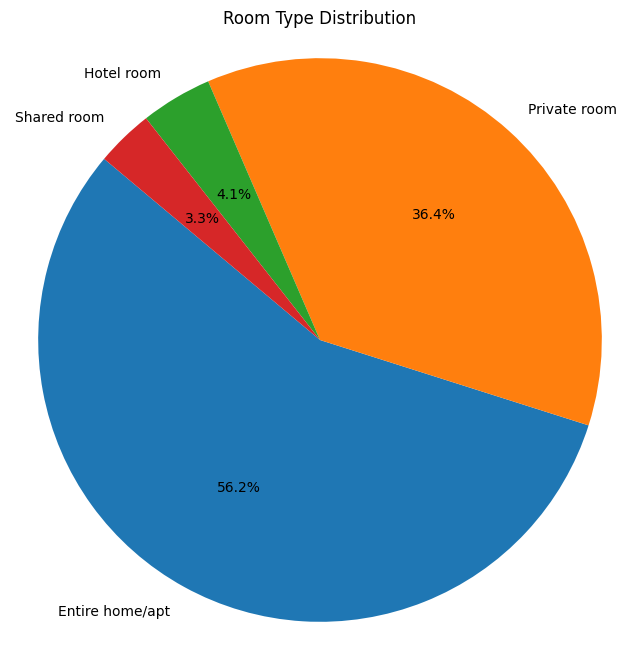

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Count values of room_type
room_counts = dfclean['room_type'].value_counts()

# Create a new DataFrame from the counts
room_df = pd.DataFrame({'room_type': room_counts.index, 'count': room_counts.values})

# Display as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_df['count'], labels=room_df['room_type'], autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Insight Pengecekan kolom room type :
Berikut adalah pengulangan jenis room type terbanyak pada dataframe dicapai oleh entire home atau apartemen dengan pengulangan sebanyak 8912 kali


In [42]:
dfclean['price'].describe()

count    1.585400e+04
mean     3.217704e+03
std      2.497212e+04
min      0.000000e+00
25%      9.000000e+02
50%      1.429000e+03
75%      2.429000e+03
max      1.100000e+06
Name: price, dtype: float64

Insight Pengecekan kolom price :
Harga terbanyak diambil dari median yaitu 1429 baht dengan harga tertinggi 1,100,000 dan nilai terendah 0
Disini perlu adannya pengecekan dengan properti yang hargannya 0

In [43]:
# Drop rows where 'price' is 0 (in-place modification)
dfclean.drop(dfclean[dfclean['price'] == 0].index, inplace=True)

In [44]:
dfclean['price'].describe()

count    1.585300e+04
mean     3.217907e+03
std      2.497290e+04
min      2.780000e+02
25%      9.000000e+02
50%      1.429000e+03
75%      2.429000e+03
max      1.100000e+06
Name: price, dtype: float64

In [45]:
dfclean.info

<bound method DataFrame.info of                        id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826  Su Kun Yi He Xin Liang Fang Gong Yu   Lou  Kao...   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

       

Karena harga 0 akan merusak hasil analisa, maka harga 0 tersebut akan kita hapus sehingga Harga terbanyak diambil dari median yaitu 1429 baht dengan harga tertinggi 1,100,000 dan nilai terendah 278 Baht

In [46]:
dfclean['minimum_nights'].value_counts()

minimum_nights
1       8255
2       1729
30      1346
3        967
28       547
        ... 
99         1
1095       1
39         1
190        1
364        1
Name: count, Length: 86, dtype: int64

Insight Pengecekan kolom minimum nights :
Jumlah minimal hari untuk menginap di dominasi jumlah 1 malam dengan total 8255 properti

In [47]:
dfclean['number_of_reviews'].value_counts()

number_of_reviews
0      5789
1      1737
2       948
3       677
4       504
       ... 
244       1
406       1
807       1
143       1
263       1
Name: count, Length: 298, dtype: int64

Insight Pengecekan kolom minimum nights :
Jumlah minimal hari untuk menginap di dominasi jumlah 1 malam dengan total 8255 properti

In [48]:
dfclean['last_review'].value_counts()

last_review
0                      5789
2022-12-11 00:00:00     189
2022-12-14 00:00:00     184
2022-12-13 00:00:00     179
2022-12-12 00:00:00     172
                       ... 
2021-02-16 00:00:00       1
2021-09-18 00:00:00       1
2021-08-06 00:00:00       1
2021-08-07 00:00:00       1
2021-06-08 00:00:00       1
Name: count, Length: 1670, dtype: int64

Insight last review : Karena banyak properti yang tidak di review, maka nilai 0 mendominasi kolom last review dan pada tanggal 11-14 Desember 2022 menjadi moment banyak properti yang di review.

In [49]:
dfclean['reviews_per_month'].value_counts()

reviews_per_month
0.00     5789
0.02      498
0.03      467
1.00      304
0.05      248
         ... 
6.96        1
4.92        1
5.17        1
4.55        1
16.00       1
Name: count, Length: 514, dtype: int64

Insight Review per month : Karena banyak properti yang tidak di review, maka nilai 0 mendominasi kolom reviews per month.

In [50]:
dfclean['calculated_host_listings_count'].value_counts()

calculated_host_listings_count
1      4605
2      1658
3      1065
4       860
5       735
6       582
8       528
7       483
9       387
10      350
11      286
12      228
228     228
13      208
22      198
44      176
25      175
21      168
20      160
14      154
19      133
62      124
24      120
15      120
28      112
37      111
18      108
26      104
34      102
17      102
99       99
33       99
49       98
48       96
23       92
45       90
89       89
29       87
41       82
40       80
39       78
36       72
16       64
32       64
31       62
30       60
56       56
53       53
35       35
27       27
Name: count, dtype: int64

Insight calculated house listing count : 1,2, dan 3 mendominasi jumlah properti yang di sewa pada nama host yang sama.

In [51]:
dfclean['availability_365'].value_counts()

availability_365
365    2392
0       856
364     674
180     437
90      334
       ... 
183       2
189       2
192       1
193       1
197       1
Name: count, Length: 366, dtype: int64

Insight availability 365 : dengan jumlah 365 hari mendominasi ketersediaan properti pada host Airbnb

In [52]:
dfclean['number_of_reviews_ltm'].value_counts()

number_of_reviews_ltm
0      9219
1      1482
2       849
3       611
4       485
       ... 
80        1
53        1
63        1
60        1
101       1
Name: count, Length: 85, dtype: int64

In [53]:
dfclean

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,Su Kun Yi He Xin Liang Fang Gong Yu Lou Kao...,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


Insight number of review ltm : dalam 12 bulan terakhir 0 review masih mendominasi kolom ini karena memang jumlah review yang minim.

In [54]:
dfclean.info

<bound method DataFrame.info of                        id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826  Su Kun Yi He Xin Liang Fang Gong Yu   Lou  Kao...   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

       

Insight :
- Properti jenis rumah dan apartemen lebih diminati oleh pelanggan Airbnb

### Rating dan Ulasan Pelanggan


Pertama kita cek seperti dulu tingkat keterisian rating, dengan melakukan perhitungan dari jumlah datannya(len)

In [55]:
revTot = len(dfclean)
revTot

15853

In [56]:
revNol = len(dfclean[dfclean['number_of_reviews_ltm']==0])
revNol

9219

In [57]:
revPer = (revNol/revTot*100)
print('Persentase kekosongan review sejumlah', round(revPer),'%')

Persentase kekosongan review sejumlah 58 %


Dengan Persentase keterisian review maka perlu dibedakan data dengan review maupun yang tidak dengan memisahkan menjadi 2 dataframe, kita namakan saja dfcom dan dfnoncom

In [58]:
dfnoncom = dfclean[dfclean['number_of_reviews_ltm']==0]
dfcom = dfclean[dfclean['number_of_reviews_ltm']!=0]

In [59]:
dfcom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6634 entries, 3 to 15796
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6634 non-null   object 
 1   name                            6634 non-null   object 
 2   host_id                         6634 non-null   int64  
 3   host_name                       6634 non-null   object 
 4   neighbourhood                   6634 non-null   object 
 5   latitude                        6634 non-null   float64
 6   longitude                       6634 non-null   float64
 7   room_type                       6634 non-null   object 
 8   price                           6634 non-null   int64  
 9   minimum_nights                  6634 non-null   int64  
 10  number_of_reviews               6634 non-null   int64  
 11  last_review                     6634 non-null   object 
 12  reviews_per_month               6634 n

Dilakukan pengecekan data yang sudah terbagi untuk mendapatkan insight dari dfcom dan dfnoncom

In [60]:
dfcom.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,6634,6634,788841933134248110,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,6634,6125,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,6634.0,NaN,NaN,NaN,147413995.993217,131155932.528438,58920.0,33909581.5,112414885.0,233081899.75,491129139.0
host_name,6634,2067,Curry,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,6634,46,Khlong Toei,1278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,6634.0,NaN,NaN,NaN,13.740088,0.035274,13.65364,13.72022,13.736378,13.752865,13.95139
longitude,6634.0,NaN,NaN,NaN,100.558401,0.041944,100.33377,100.532193,100.559115,100.579134,100.790749
room_type,6634,4,Entire home/apt,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,6634.0,NaN,NaN,NaN,2227.410009,12688.242338,295.0,950.0,1466.0,2290.75,1014758.0
minimum_nights,6634.0,NaN,NaN,NaN,9.007688,26.157678,1.0,1.0,2.0,7.0,998.0


In [61]:
dfnoncom.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,9219,9219,790476492384199044,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,9219,8620,New! La Chada Night Market studio 2PPL near MRT,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,9219.0,NaN,NaN,NaN,158898798.453628,132174090.239089,70413.0,43562187.5,125327411.0,246314424.0,492665929.0
host_name,9219,4253,Curry,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,9219,50,Vadhana,1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,9219.0,NaN,NaN,NaN,13.748783,0.047527,13.5273,13.71997,13.74093,13.767085,13.95354
longitude,9219.0,NaN,NaN,NaN,100.560983,0.056469,100.32955,100.526,100.563269,100.590005,100.92344
room_type,9219,4,Private room,4288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,9219.0,NaN,NaN,NaN,3930.66927,30909.727838,278.0,866.0,1400.0,2500.0,1100000.0
minimum_nights,9219.0,NaN,NaN,NaN,19.816358,62.446084,1.0,1.0,1.0,7.0,1125.0


In [62]:
dfcom['minimum_nights'].mode()

0    1
Name: minimum_nights, dtype: int64

In [63]:
dfnoncom['minimum_nights'].mode()

0    1
Name: minimum_nights, dtype: int64

In [64]:
dfcom['availability_365'].mode()

0    365
Name: availability_365, dtype: int64

In [65]:
dfnoncom['availability_365'].mode()

0    365
Name: availability_365, dtype: int64

In [66]:
dfnoncom.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,9219,9219,790476492384199044,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,9219,8620,New! La Chada Night Market studio 2PPL near MRT,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,9219.0,NaN,NaN,NaN,158898798.453628,132174090.239089,70413.0,43562187.5,125327411.0,246314424.0,492665929.0
host_name,9219,4253,Curry,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,9219,50,Vadhana,1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,9219.0,NaN,NaN,NaN,13.748783,0.047527,13.5273,13.71997,13.74093,13.767085,13.95354
longitude,9219.0,NaN,NaN,NaN,100.560983,0.056469,100.32955,100.526,100.563269,100.590005,100.92344
room_type,9219,4,Private room,4288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,9219.0,NaN,NaN,NaN,3930.66927,30909.727838,278.0,866.0,1400.0,2500.0,1100000.0
minimum_nights,9219.0,NaN,NaN,NaN,19.816358,62.446084,1.0,1.0,1.0,7.0,1125.0


In [67]:
dfcom.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,6634,6634,788841933134248110,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,6634,6125,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,6634.0,NaN,NaN,NaN,147413995.993217,131155932.528438,58920.0,33909581.5,112414885.0,233081899.75,491129139.0
host_name,6634,2067,Curry,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,6634,46,Khlong Toei,1278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,6634.0,NaN,NaN,NaN,13.740088,0.035274,13.65364,13.72022,13.736378,13.752865,13.95139
longitude,6634.0,NaN,NaN,NaN,100.558401,0.041944,100.33377,100.532193,100.559115,100.579134,100.790749
room_type,6634,4,Entire home/apt,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,6634.0,NaN,NaN,NaN,2227.410009,12688.242338,295.0,950.0,1466.0,2290.75,1014758.0
minimum_nights,6634.0,NaN,NaN,NaN,9.007688,26.157678,1.0,1.0,2.0,7.0,998.0


In [68]:
dfcom['name'].value_counts()

name
30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P)    33
New! Gateway/ Bangkok University 1BR 2PPL near BTS    26
30days!  Sukhumvit NANA spacious 1BR 2PPL near BTS    25
1BR Twin Suit 2ppl/Surasak BTS Sathorn/Pool /WIFI     22
1BR Twin Suit 2ppl/Surasak BTS Sathorn/Pool /Wifi     21
                                                      ..
Luxtury2BRcondo /22Fcityview/1mi tobts/freepickup      1
aicchklaangemuue ngtidhaangai kh nsyaam                1
1br/Free pool&gym/WIFI-Asok/SukhumvitBTS! 2PP          1
LOFT 2 BR Silom- 5 min BTS S Taksin                    1
Thong Lor / Sukhumvit Road                             1
Name: count, Length: 6125, dtype: int64

Dari Describe diatas dapat kita bandingkan dari faktor kolomnnya, berikut hasil analisa kasarnnya,

| Faktor | Dengan Komentar | Tanpa Komentar  |
|:------: |:----------------:|:---------------:|
| Nama Properti  |30days! AirportLink Sukhumvit NANA MaxValu 2BR      |New! La Chada Night Market studio 2PPL near MRT  |
| Nama Host    | Curry | Curry        |
| Daerah   |  Khlong Toei    | Vadhana          |
| Jenis Properti  | Entire Home/APT   |Private Room     |
| Minimum hari menginap   |  1 | 1     |
| Ketersediaan (hari)   | 365 | 365  |



Dari Tabel diatas, analisa bisa kita kerucutkan ke dua properti sehingga bisa menjawab alasan properti tersebut diberi komentar dan tidak
juga bisa dianalisa untuk komentarnnya lebih mengarah ke positif atau negatif ?

Dari Tabel diatas bisa disimpulkan bahwa : 
- Properti dengan konsep sharing space lebih memiliki kesempatan lebih kecil untuk di komentar

Selanjutnnya kita analisa komentar dari properti New! La Chada Night Market studio 2PPL near MRT



In [69]:
df30 = dfcom[dfcom['name']=='30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P)']
df30.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7454,33476919,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,201677068,Curry,Ratchathewi,13.74907,100.55652,Entire home/apt,2527,3,30,2022-08-24 00:00:00,0.67,228,358,1
7494,33499842,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,201677068,Curry,Ratchathewi,13.74896,100.55504,Entire home/apt,2826,3,66,2022-12-22 00:00:00,1.48,228,344,15
7644,34005780,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,201677068,Curry,Ratchathewi,13.75089,100.55503,Entire home/apt,2527,3,27,2022-12-11 00:00:00,0.61,228,359,3
7933,34984076,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,201677068,Curry,Ratchathewi,13.74894,100.55503,Entire home/apt,2527,3,29,2022-11-30 00:00:00,0.67,228,344,4
8475,36894063,30days! AirportLink Sukhumvit NANA MaxValu 2BR...,201677068,Curry,Ratchathewi,13.75066,100.55436,Entire home/apt,2527,3,51,2022-12-25 00:00:00,1.22,228,329,10


In [70]:
df30['id'].value_counts()

id
33476919              1
33499842              1
34005780              1
34984076              1
36894063              1
36981297              1
37543284              1
37695067              1
38004687              1
38146514              1
38164848              1
38503924              1
38554711              1
38396099              1
38421592              1
38705181              1
39236229              1
39349515              1
39430081              1
39542437              1
39935593              1
40436962              1
40714608              1
40975318              1
41069237              1
41010931              1
43445389              1
43583387              1
43583812              1
43606045              1
674322557310305126    1
694591156222686766    1
736572670939348740    1
Name: count, dtype: int64

Dari semua pelanggan 30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P), belum ada pelanggan yang datang lebih dari sekali

Sekarang kita bandingkan dengan dfnoncom yang paling banyak untuk melihat perbedaannya

In [71]:
dflachada = dfnoncom[dfnoncom['name']=='New!  La Chada Night Market studio 2PPL near MRT']
dflachada.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
8138,35326727,New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Huai Khwang,13.77094,100.58137,Entire home/apt,968,30,37,2020-10-24 00:00:00,0.86,228,364,0
8495,37467488,New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Huai Khwang,13.77228,100.57953,Entire home/apt,1000,1,18,2020-02-28 00:00:00,0.44,228,0,0
8512,37103316,New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Huai Khwang,13.76507,100.58662,Entire home/apt,1000,1,39,2021-02-22 00:00:00,0.95,228,0,0
8571,37728711,New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Huai Khwang,13.76582,100.58673,Entire home/apt,1000,1,11,2020-01-16 00:00:00,0.27,228,0,0
8617,37298481,New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Huai Khwang,13.77272,100.58113,Entire home/apt,1000,1,15,2020-02-27 00:00:00,0.37,228,0,0


In [72]:
dflachada['id'].value_counts()

id
35326727    1
37467488    1
37103316    1
37728711    1
37298481    1
37612816    1
37340769    1
37819871    1
37893129    1
38825304    1
38421150    1
38677997    1
38885999    1
39235862    1
39260368    1
39281028    1
40018001    1
39956930    1
40544940    1
40359452    1
40623917    1
40293857    1
40435818    1
41052434    1
42590762    1
42591179    1
42592456    1
42595084    1
42918882    1
43435987    1
43435999    1
43436018    1
43481075    1
43481091    1
43500095    1
43500134    1
43501056    1
43501072    1
43606164    1
43376364    1
43376388    1
43416066    1
43416101    1
43416110    1
44560735    1
Name: count, dtype: int64

Dari semua pelanggan New!  La Chada Night Market studio 2PPL near MRT, belum ada pelanggan yang datang lebih dari sekali

### Ulasan dengan Host

kita cek dahulu dari dfcom yang hostnnya terbanyak

In [73]:
dfcomhost = dfcom['host_id'].value_counts().head(10)
dfcomhost = dfcomhost.reset_index()
dfcomhost.columns = ['host_id','jumlah_listing']

# Mengambil data host_id dari dfclean yang ada di dfcomhost
dfcomhost2 = pd.merge(dfcomhost, dfclean[['host_id', 'host_name']], on='host_id', how='left')

#drop duplicates
dfcomhost2 = dfcomhost2.drop_duplicates(subset=['host_id'])
dfcomhost2 

,host_id,jumlah_listing,host_name
0,201677068,157,Curry
228,52161947,75,Noons
327,26736483,69,K
416,62257044,52,Ludoping
472,312545246,48,Mike
521,79624768,44,Eva
565,89820474,43,Ken-Bambu
613,66923696,39,Panda
661,314945555,38,Nana
710,40262107,36,Patty


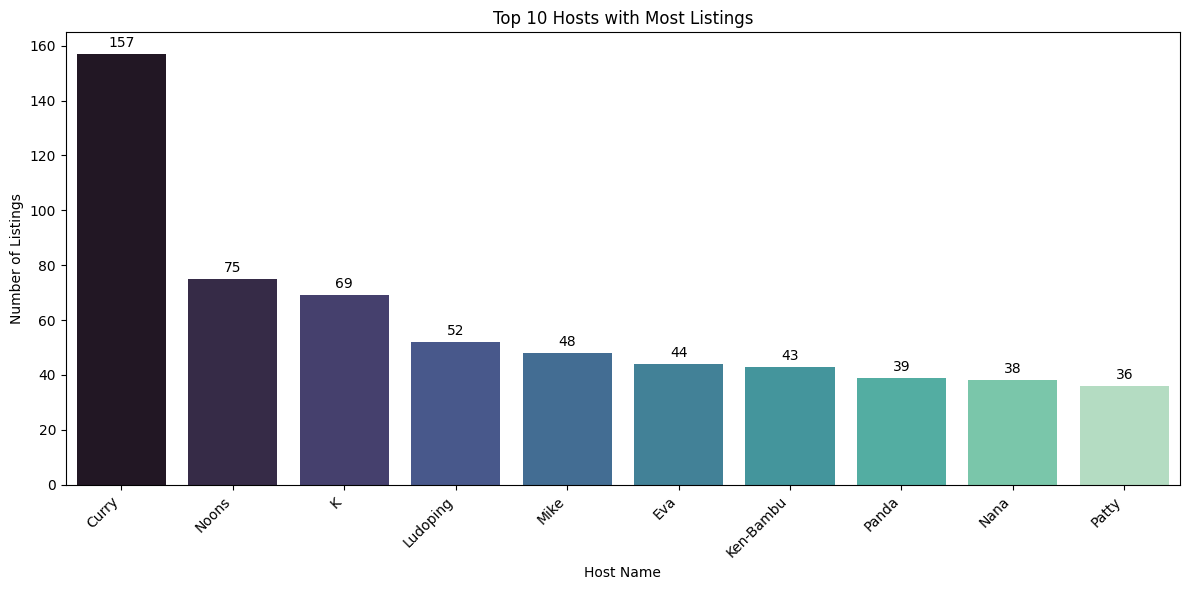

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dfcomhost2, x='host_name', y='jumlah_listing', palette='mako')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Styling
plt.title('Top 10 Hosts with Most Listings')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [75]:
dfcomhost = dfnoncom['host_id'].value_counts().head(10)
dfcomhost = dfcomhost.reset_index()
dfcomhost.columns = ['host_id','jumlah_listing']

# Mengambil data host_id dari dfclean yang ada di dfcomhost
dfcomhost2 = pd.merge(dfcomhost, dfclean[['host_id', 'host_name']], on='host_id', how='left')

#drop duplicates
dfcomhost2 = dfcomhost2.drop_duplicates(subset=['host_id'])
dfcomhost2 

,host_id,jumlah_listing,host_name
0,201677068,71,Curry
228,228535635,60,Pornchai
290,68154488,45,Dusadee
352,34795931,42,Kim
396,8444643,42,Kiattisak
449,44305808,40,Lek Boonsiri
490,434168399,34,Krittika
534,8663142,32,ISanook Hotel
579,262923052,28,Camila
609,2129668,28,Wimonpak


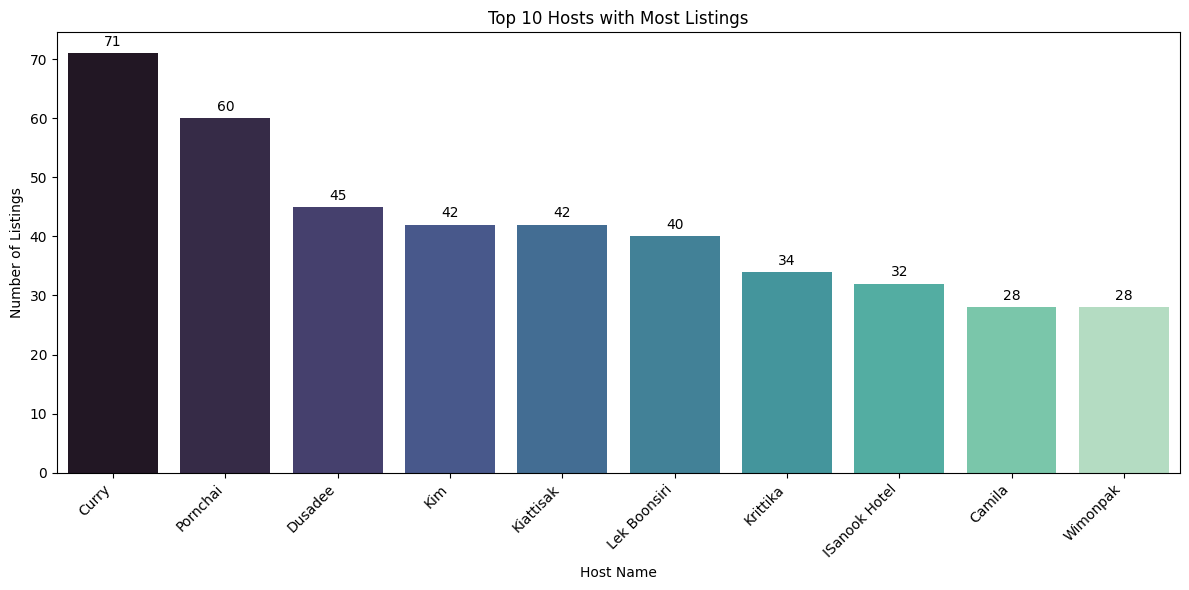

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dfcomhost2, x='host_name', y='jumlah_listing', palette='mako')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Styling
plt.title('Top 10 Hosts with Most Listings')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


Insight : Listing dengan host bernama Curry memiliki banyak Review dibandingkan dengan nama host lain. namun bagaimana dengan proporsinnya ?

### Ulasan Dengan Neighbourhood

In [77]:
dfcomn = dfcom['neighbourhood'].value_counts().head(10)
dfcomn = dfcomn.reset_index()
dfcomn.columns = ['neighbourhood','jumlah_listing']
dfcomn

,neighbourhood,jumlah_listing
0,Khlong Toei,1278
1,Vadhana,1073
2,Ratchathewi,525
3,Sathon,435
4,Huai Khwang,400
5,Bang Rak,368
6,Parthum Wan,229
7,Phra Khanong,215
8,Phra Nakhon,211
9,Bang Na,195


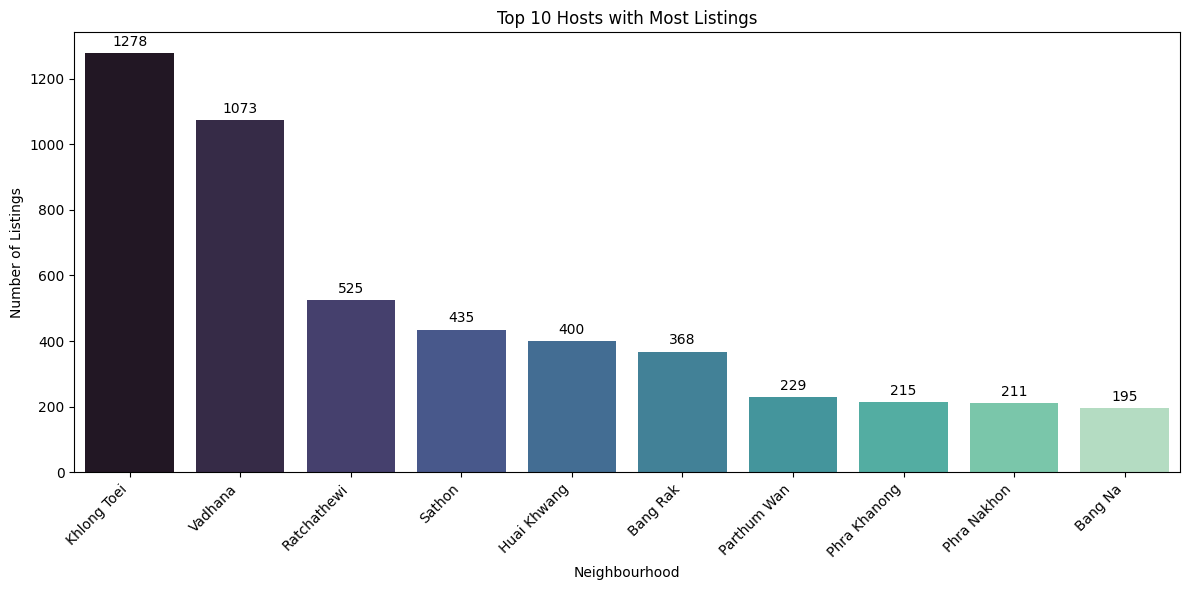

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dfcomn, x='neighbourhood', y='jumlah_listing', palette='mako')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Styling
plt.title('Top 10 Hosts with Most Listings')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [79]:
#tanpa ulasan
dfcomn = dfnoncom['neighbourhood'].value_counts().head(10)
dfcomn = dfcomn.reset_index()
dfcomn.columns = ['neighbourhood','jumlah_listing']
dfcomn

,neighbourhood,jumlah_listing
0,Vadhana,1079
1,Khlong Toei,819
2,Huai Khwang,725
3,Ratchathewi,589
4,Bang Rak,459
5,Phra Nakhon,408
6,Chatu Chak,381
7,Sathon,374
8,Phra Khanong,343
9,Suanluang,274


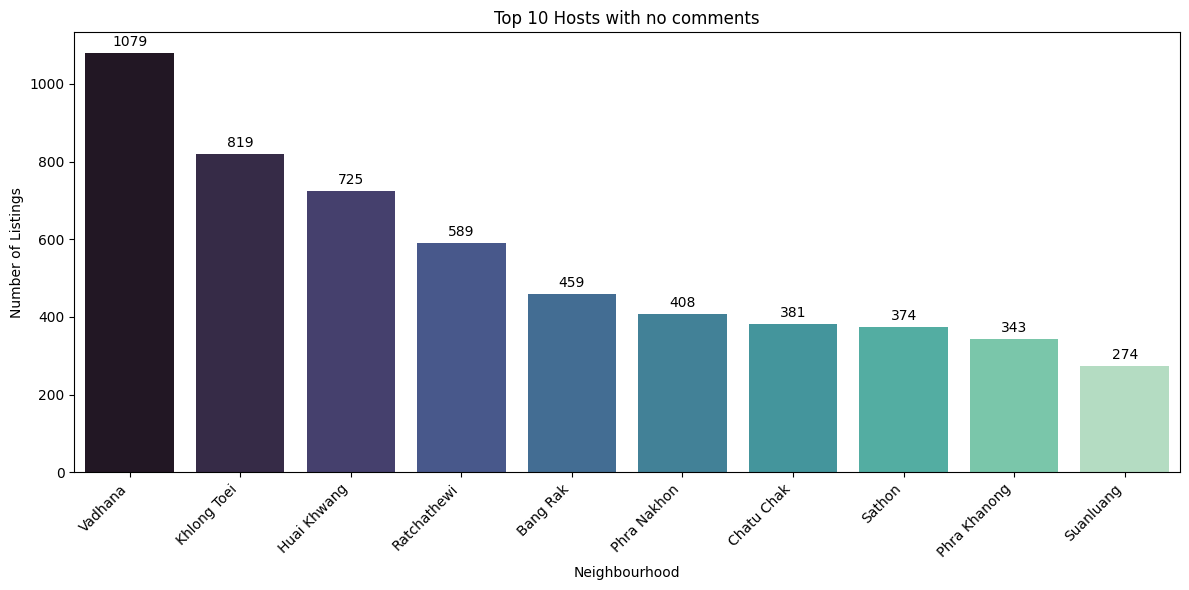

In [80]:
# tanpa ulasan
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dfcomn, x='neighbourhood', y='jumlah_listing', palette='mako')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Styling
plt.title('Top 10 Hosts with no comments')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [81]:
dfclean[dfclean['neighbourhood']=='Vadhana']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2022-11-22 00:00:00,2.59,1,349,3
22,965722,Siamese Gioia on Sukhumvit 31,5265861,Chuchart,Vadhana,13.744440,100.570030,Private room,3775,30,3,2018-12-24 00:00:00,0.05,1,364,0
32,159854,Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7,766443,Gerd,Vadhana,13.742930,100.556030,Entire home/apt,1659,3,212,2022-12-08 00:00:00,1.58,3,207,7
37,978969,"60 m2 apartment in Thong Lor, Bangkok",5358785,Danny,Vadhana,13.732240,100.578030,Entire home/apt,1870,4,5,2019-11-10 00:00:00,0.05,1,331,0
39,169514,2br apt in Sukhumvit Asoke near BTS,729617,Kanchuya,Vadhana,13.744640,100.557840,Entire home/apt,1732,90,0,0,0.00,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,790264226712277949,5 Beds in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740168,100.556320,Shared room,2276,1,0,0,0.00,14,365,0
15828,790266011396665923,1 Bed in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740168,100.556320,Shared room,455,1,0,0,0.00,14,365,0
15829,790278230325843023,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,0,0.00,14,360,0
15831,790280473547745220,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,0,0.00,14,360,0


Insight : Daerah Khlong Toei menjadi daerah yang propertinnya banyak di review

### Ulasan dengan Jenis Properti

In [82]:
dfcomt = dfcom['room_type'].value_counts().head(10)
dfcomt = dfcomt.reset_index()
dfcomt.columns = ['room_type','jumlah_listing']
dfcomt

,room_type,jumlah_listing
0,Entire home/apt,4885
1,Private room,1482
2,Hotel room,192
3,Shared room,75


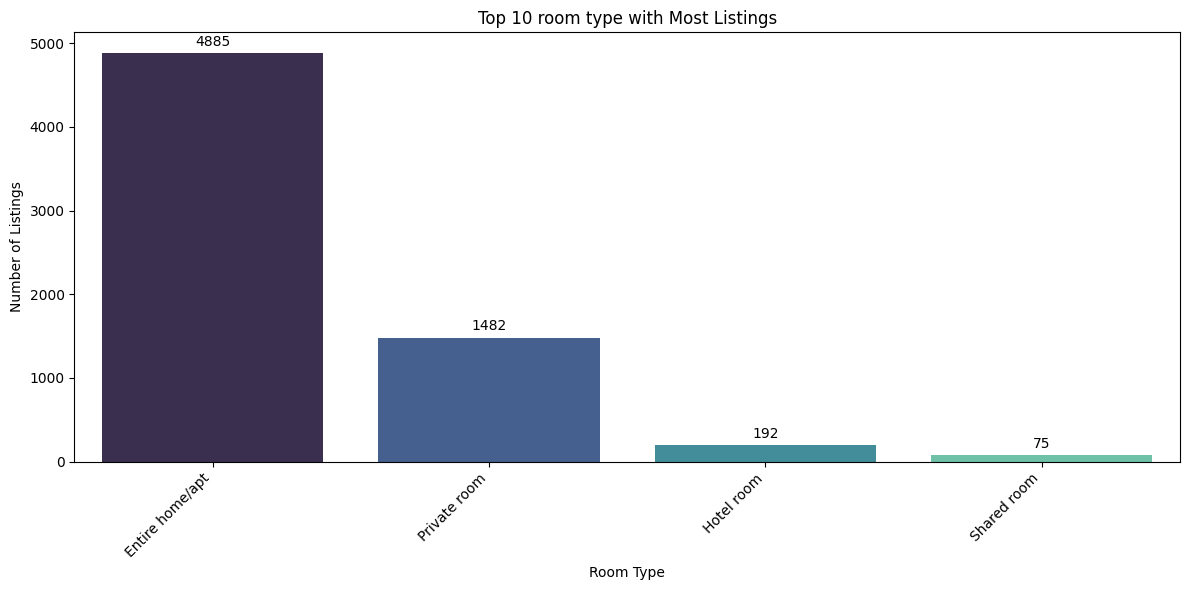

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dfcomt, x='room_type', y='jumlah_listing', palette='mako')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Styling
plt.title('Top 10 room type with Most Listings')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [84]:
dfcomt = dfnoncom['room_type'].value_counts().head(10)
dfcomt = dfcomt.reset_index()
dfcomt.columns = ['room_type','jumlah_listing']
dfcomt

,room_type,jumlah_listing
0,Private room,4288
1,Entire home/apt,4027
2,Hotel room,456
3,Shared room,448


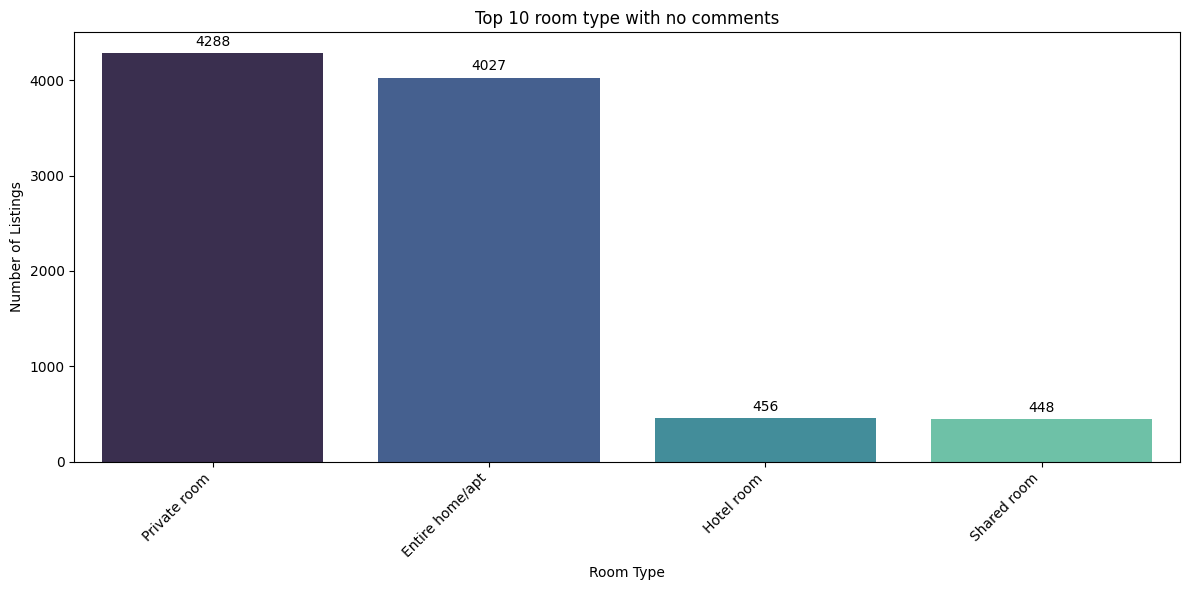

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dfcomt, x='room_type', y='jumlah_listing', palette='mako')

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Styling
plt.title('Top 10 room type with no comments')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


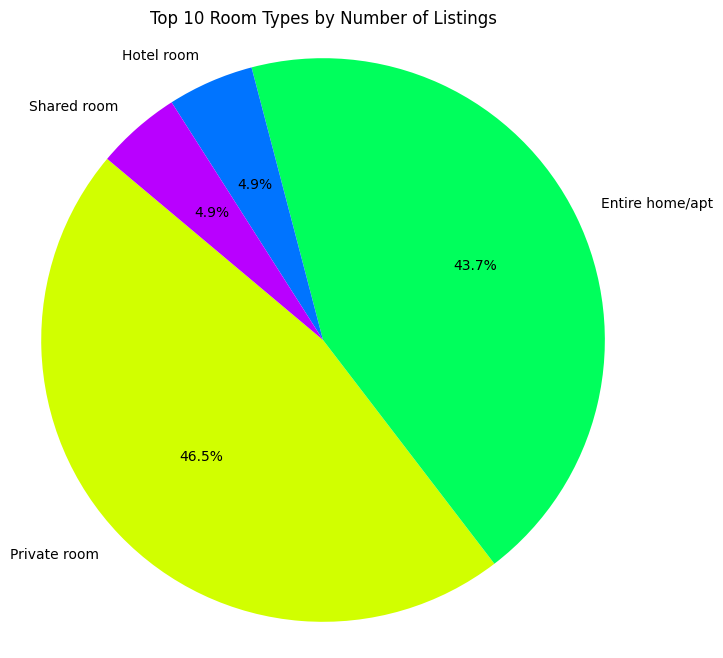

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a color palette with as many colors as room types
colors = sns.color_palette("hsv", len(dfcomt))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    dfcomt['jumlah_listing'],
    labels=dfcomt['room_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title and format
plt.title('Top 10 Room Types by Number of Listings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is a circle.

# Show the plot
plt.show()



In [87]:
# Cek Proporsi
dfcomt = dfcom['room_type'].value_counts().head(10)
dfcomt = dfcomt.reset_index()
dfcomt.columns = ['room_type','jumlah_listing']
dfcomt



,room_type,jumlah_listing
0,Entire home/apt,4885
1,Private room,1482
2,Hotel room,192
3,Shared room,75


In [88]:
dfcomt2 = df.groupby('room_type')['id'].count()
dfcomt2 = dfcomt2.reset_index()
dfcomt2.columns = ['room_type','jumlah_listing_total']
dfcomt2

,room_type,jumlah_listing_total
0,Entire home/apt,8912
1,Hotel room,648
2,Private room,5770
3,Shared room,523


In [89]:
dfcomt3 =pd.merge(dfcomt, dfcomt2, on='room_type', how='outer')

dfcomt3

,room_type,jumlah_listing,jumlah_listing_total
0,Entire home/apt,4885,8912
1,Hotel room,192,648
2,Private room,1482,5770
3,Shared room,75,523


In [90]:
dfcomt3['persen'] = dfcomt3['jumlah_listing']/dfcomt3['jumlah_listing_total']*100
dfcomt3

,room_type,jumlah_listing,jumlah_listing_total,persen
0,Entire home/apt,4885,8912,54.813734
1,Hotel room,192,648,29.629630
2,Private room,1482,5770,25.684575
3,Shared room,75,523,14.340344


Shared Room memiliki persentase terendah untuk keterisian komentar

Insight : Jenis Properti entire home memiliki komentar terbanyak

### Ulasan dengan range harga

In [91]:
dfcom.price.max()-dfcom.price.min()

np.int64(1014463)

### Tren Jenis Penyewaan Properti
Analisa jenis properti apa yang disukai pelanggan dan berapa jumlah kamar yang paling favorit.

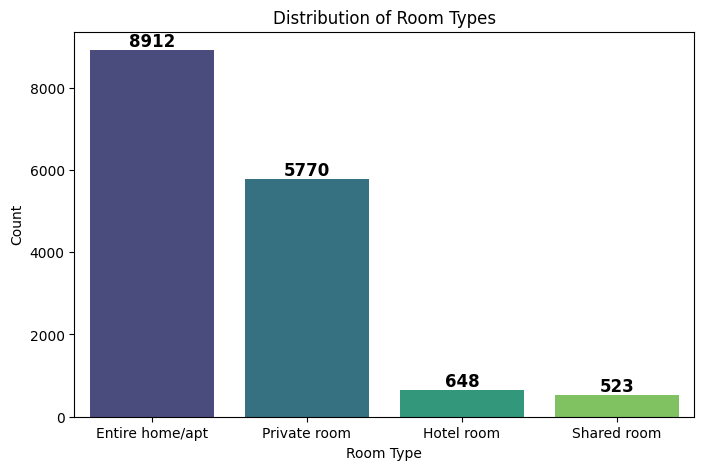

In [92]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='room_type', data=dfclean, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
# Customize plot
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Show the plot
plt.show()

Lalu kita bandingkan review dengan timeline

Insight :
Jumlah reviewer terbanyak pada akhir tahun 2022

### Performa Host

Analisis untuk mencari host dengan tingkat okupansi terbaik dalam data set

In [93]:
dfclean['host_name'].value_counts()

host_name
Curry        228
Noons         99
K             91
Pornchai      63
Dusadee       62
            ... 
Igor           1
Nacharot       1
Ana Elena      1
Yossawat       1
Renee          1
Name: count, Length: 5312, dtype: int64

Dilakukan pengecekan mendalam untuk host pornchai dan dusadee

In [94]:

df1 = dfclean[dfclean['host_name']=='Dusadee']
df2 = dfclean[dfclean['host_name']=='Pornchai']
df3 = pd.concat([df1, df2], ignore_index=True)
df3.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,125,125,13774952,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,125,76,14 Male Dormitory Room,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,125.0,NaN,NaN,NaN,149266932.656,80850224.995308,68154488.0,68154488.0,228535635.0,228535635.0,263578956.0
host_name,125,2,Pornchai,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,125,4,Phra Nakhon,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,125.0,NaN,NaN,NaN,13.745814,0.015884,13.72529,13.73188,13.75287,13.75875,13.83702
longitude,125.0,NaN,NaN,NaN,100.516272,0.019273,100.49669,100.49821,100.52444,100.53017,100.57557
room_type,125,4,Shared room,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,125.0,NaN,NaN,NaN,2055.4,2059.117573,500.0,550.0,1000.0,3199.0,15442.0
minimum_nights,125.0,NaN,NaN,NaN,2.432,16.010247,1.0,1.0,1.0,1.0,180.0


Host dengan nama Curry memiliki transaksi Airbnb terbanyak

### Lokasi Terpopuler

In [95]:
dfclean['neighbourhood'].value_counts()

neighbourhood
Vadhana                 2152
Khlong Toei             2097
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               548
Bang Na                  458
Parthum Wan              455
Din Daeng                444
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                260
Bang Sue                 250
Bang Phlat               217
Yan na wa                200
Thon buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Dusit                     91
Bangkok Yai               90


Daerah Vadhana memiliki transaksi Airbnb terbanyak

### Harga Optimal

In [96]:
dfclean.info

<bound method DataFrame.info of                        id                                               name  \
0                   27934                    Nice room with superb city view   
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                         Suite Room 3 at MetroPoint   
...                   ...                                                ...   
15849  790465040741092826  Su Kun Yi He Xin Liang Fang Gong Yu   Lou  Kao...   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

       

In [97]:
dfclean['price'].median()

np.float64(1429.0)

1429 Baht adalah nilai tengah dari seluruh data set Airbnb yang di dapat

### Durasi Menginap Pelanggan

In [98]:
dfclean['minimum_nights'].value_counts()

minimum_nights
1       8255
2       1729
30      1346
3        967
28       547
        ... 
99         1
1095       1
39         1
190        1
364        1
Name: count, Length: 86, dtype: int64

Tamu dengan Minimum Nights 1 malam mendominasi transaksi Airbnb

### Segmentasi Pelanggan

Tidak ada id penyewa yang duplicate, artinnya belum ada pelanggan yang datang ke tempat yang sama atau belum ada pelanggan yang loyal

### Dampak Musiman

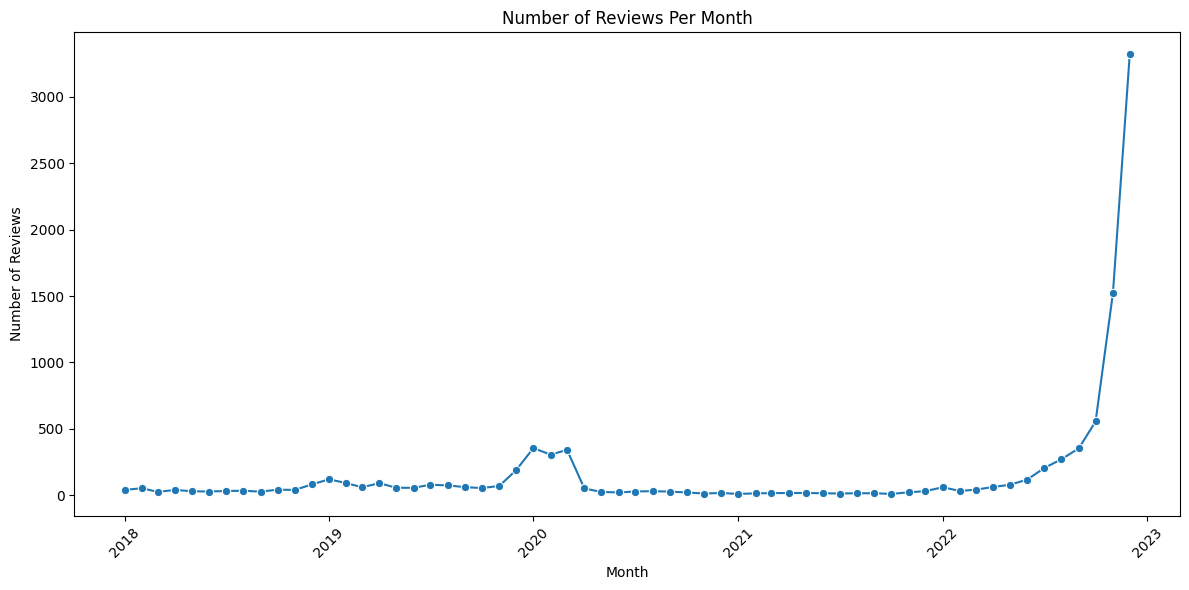

In [99]:
# 1. Mengubah tipe data

dfclean['last_review'] = pd.to_datetime(dfclean['last_review'], errors='coerce')
dfclean2 = dfclean[dfclean['last_review'] >= '2018-01-01']

#2. Menghapus data tahun 1970 yang mana data tersebut tidak valid

dfclean2 = dfclean2.dropna(subset=['last_review'])

# 3. Buat kolom baru year-month
dfclean2['review_month'] = dfclean2['last_review'].dt.to_period('M').dt.to_timestamp()

# 4. Menghitung review per bulan
monthly_reviews = dfclean2['review_month'].value_counts().sort_index().reset_index()
monthly_reviews.columns = ['review_month', 'review_count']

# 5. Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_reviews, x='review_month', y='review_count', marker='o')
plt.title('Number of Reviews Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight :
Jumlah reviewer terbanyak pada akhir tahun 2022

### Korelasi Harga dengan neighbourhood

In [100]:
dfkor= dfclean.groupby(['neighbourhood'])['price'].median().reset_index()
dfkor = dfkor.sort_values(by='price', ascending=False)
dfkor

,neighbourhood,price
27,Nong Chok,2539.0
29,Parthum Wan,2400.0
39,Samphanthawong,2000.0
47,Vadhana,2000.0
8,Bang Rak,1850.0
34,Pom Prap Sattru Phai,1709.0
22,Khlong Toei,1700.0
37,Ratchathewi,1536.0
43,Taling Chan,1502.5
44,Thawi Watthana,1500.0


### Korelasi Harga dengan room type

In [101]:
dfkor2= dfclean.groupby(['room_type'])['price'].median().reset_index()
dfkor2 = dfkor2.sort_values(by='price', ascending=False)
dfkor2

,room_type,price
1,Hotel room,1700.0
0,Entire home/apt,1536.0
2,Private room,1212.0
3,Shared room,500.0


### Korelasi Harga dengan Nama dan ID host

In [102]:
dfkor3= dfclean.groupby(['host_id','host_name'])['price'].median().reset_index()
dfkor3 = dfkor3.sort_values(by='price', ascending=False)
dfkor3

,host_id,host_name,price
558,12464705,Lucio,1100000.0
1317,30803267,Yasmine,1000000.0
1216,28589379,Lily,710760.0
3068,99882630,Jiranuch,429443.0
4978,234881965,Napawadee,314870.0
...,...,...,...
5434,273709534,Varistha,310.0
5386,269724000,Born Free Hostel,305.0
5763,313221586,Krit,304.0
5770,314098135,Khwanjai,300.0


### Korelasi Harga dengan Minimum Night

In [103]:
dfkor4= dfclean.groupby(['minimum_nights'])['price'].median().reset_index()
dfkor4 = dfkor4.sort_values(by='price', ascending=False)
dfkor4

,minimum_nights,price
75,399,65000.0
80,998,35000.0
36,51,30000.0
81,999,8228.5
78,500,7286.0
...,...,...
72,364,510.0
77,450,450.0
55,148,450.0
51,109,442.0


## Kesimpulan dan Rekomendasi 

Insight : 
-  New!  'La Chada Night Market studio 2PPL near MRT' adalah properti terlaris dalam transaksi Airbnb dan tidak memiliki feedback berupa komentar.
- Curry adalah host yang memiliki transaksi terbanyak 
- Vadhana adalah daerah terfavorit dalam transaksi Airbnb
- Entire Home/Apt adalah jenis properti Favorit 
- Dengan harga tengah di 1429 Baht
- Dengan Minimal hari di satu malam
- Jumlah Review 58% dari total keseluruhan

Data : 
- Sinkronasi kolom dengan data type
- Sinkronasi Nama properti keseluruhan menggunakan huruf latin agar mudah dipahami

Nilai Rendah :
- Host = Pornchai
- Neighbourhood = Vadhana 
- Room Type = Shared Room

Rekomendasi :
- Penyuluhan ‘Pentingnnya ulasan dalam bisnis sewa properti’  kepada Host dengan tingkat keterisian Review rendah.
- Peningkatan komentar pada Neighbourhood dapat dengan memberikan voucher discount jika melakukan ulasan, Vadhana bisa jadi rendah dalam proporsi, namun jumlah properti disana juga banyak. Sehingga perlunnya peningkatan jumlah properti dan pengunjung di neighbourhood lainnya
- Shared Room juga memiliki proporsi yang kecil, sehingga peningkatan jumlah shared room dan jumlah review perlu ditingkatkan.
